In [16]:
import scipy.io
import matplotlib.pyplot as plt
import os

import numpy as np

from os import listdir
from os.path import isfile, join

In [129]:
filepath_positions = r"C:\Users\felix\Documents\local data dump\rat brain data files grid cells"

filenames = ['Hafting_Fig2c_Trial1', 'Hafting_Fig2c_Trial2', 
            'Hafting_Fig2d_Trial1', 'Hafting_Fig2d_Trial2', 'rat_10925']

fig, ax = plt.subplots(1,len(filenames),figsize=(15,2.5),sharey=True)
plot_idx=0
for filename in filenames:
    mat = scipy.io.loadmat(os.path.join(filepath_positions, filename))
    
    print(mat)

    ax[plot_idx].plot(mat['pos_x'], mat['pos_y'], linewidth=.1)
    plot_idx+=1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Apr 06 18:04:23 2006', '__version__': '1.0', '__globals__': [], 'pos_y': array([[        nan],
       [        nan],
       [        nan],
       ...,
       [32.23529951],
       [32.23529951],
       [31.83369309]]), 'pos_timeStamps': array([[0.00000e+00],
       [2.00000e-02],
       [4.00000e-02],
       ...,
       [1.19994e+03],
       [1.19996e+03],
       [1.19998e+03]]), 'pos_x': array([[        nan],
       [        nan],
       [        nan],
       ...,
       [-3.0743239 ],
       [-3.0743239 ],
       [-1.86950462]]), 'rat11015_t5c1_timeStamps': array([[9.41760417e-01],
       [1.32193750e+00],
       [1.36235417e+00],
       ...,
       [1.19594057e+03],
       [1.19595236e+03],
       [1.19618084e+03]]), 'rat11015_t5c2_timeStamps': array([[   2.34466667],
       [   2.38095833],
       [   2.39084375],
       ...,
       [1195.33211458],
       [1195.38303125],
       [1198.5031875 ]]), 'rat11015_t5c

In [124]:
filepath_eeg = r"C:\Users\felix\Documents\local data dump\rat brain data files grid cells\layer3"

filenames_eeg = [f for f in listdir(filepath_eeg)
                 if isfile(join(filepath_eeg, f))
                     and ".mat" in f[-len(".mat"):].lower()
                     and not(".pos" in f[-len("pos.mat"):].lower())
                     and "LT-08010710" in f]
filenames_pos = [f for f in listdir(filepath_eeg)
                 if isfile(join(filepath_eeg, f))
                     and "pos.mat" in f[-len("POS.mat"):].lower()
                     and "LT-08010710" in f]
data_eeg = []
data_pos = []

print(filenames_eeg)
print(filenames_pos)

n_plots = min(10, len(filenames_eeg))
fig, ax = plt.subplots(n_plots,1,figsize=(15,10),sharex=True)

plot_idx=0
for filename_eeg in filenames_eeg[:len(ax)]:
    filename_pos = filenames_pos[0]#[plot_idx]
    mat_eeg = scipy.io.loadmat(os.path.join(filepath_eeg, filename_eeg))
    mat_pos = scipy.io.loadmat(os.path.join(filepath_eeg, filename_pos))
    
    if "EEG" in mat_eeg:
        print(mat_eeg)
        data_eeg.append(mat_eeg['EEG'])
        data_pos.append(np.column_stack([mat_pos['post'], mat_pos['posx'], mat_pos['posy']]))

        ax[plot_idx].plot(mat_eeg['EEG'][0:1000], linewidth=1)
        ax[plot_idx].set_yticks([])
        plot_idx+=1
        if plot_idx >= n_plots:
            break

[]
[]


<Figure size 1080x720 with 0 Axes>

In [58]:
# create observation dataset
for k in range(len(data_eeg)):
    print(k, len(data_eeg[k]))
data_full_eeg = np.row_stack(data_eeg)
data_full_pos = np.row_stack(data_pos)

print("data_eeg", data_full_eeg.shape)
print("data_pos", data_full_pos.shape)

0 300000
1 5760000
2 5760000
3 5760000
4 300000
5 300000
6 300000
7 5760000
data_eeg (24240000, 1)
data_pos (480000, 3)


In [64]:
(4*5760000)

23040000

(150000, 1) (30000, 1)
(150000, 1)
(319, 1)
total time EEG 600.0
max time pos 599.98


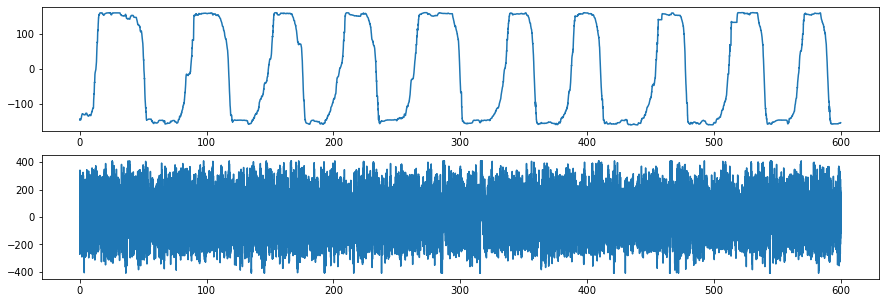

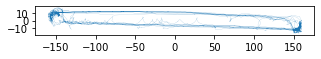

In [128]:
filestart = ["11684-06020711", '11684-14020710', '11684-14030710', 'LT-08010710', 'LT-14030610'][-1]
filestart = ['LT-02100610', 'LT-02100613'][-1]

print(
    scipy.io.loadmat(os.path.join(filepath_eeg, filestart + "_EEG"))['EEG'].shape,
    scipy.io.loadmat(os.path.join(filepath_eeg, filestart + "_POS"))['posx'].shape)

mat_pos = scipy.io.loadmat(os.path.join(filepath_eeg, filestart + "_POS"))
mat_eeg = scipy.io.loadmat(os.path.join(filepath_eeg, filestart + "_EEG"))
print(mat_eeg["EEG"].shape)
print(mat_eegtime.shape)

total_time_eeg = mat_eeg["EEG"].shape[0]/mat_eeg["Fs"][0][0]
print('total time EEG', total_time_eeg)
print('max time pos', np.max(mat_pos['post']))

fig,ax=plt.subplots(2,1, figsize=(15,5))

ax[0].plot(mat_pos['post'], mat_pos['posx'])
ax[1].plot(np.linspace(0, total_time_eeg, mat_eeg["EEG"].shape[0])[:-1], mat_eeg["EEG"][:-1]);

fig,ax=plt.subplots(1,1, figsize=(5,5))
ax.plot(mat_pos['posx'], mat_pos['posy'], linewidth=.1)
ax.set_aspect(1)